In [1]:
import numpy as np 
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
df = pd.read_csv("Churn_Modelling.csv")

In [3]:
df.shape

(10000, 14)

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [6]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [9]:
100*df['Exited'].value_counts()/len(df)

0    79.63
1    20.37
Name: Exited, dtype: float64

In [10]:
print(df['Tenure'].max())

10


In [11]:
labels = ["{0} - {1}".format(i,i+1) for i in range(1,11,1)]

In [12]:
labels

['1 - 2',
 '2 - 3',
 '3 - 4',
 '4 - 5',
 '5 - 6',
 '6 - 7',
 '7 - 8',
 '8 - 9',
 '9 - 10',
 '10 - 11']

In [13]:
df.drop(columns=['RowNumber','Surname','CustomerId'],inplace=True)

In [14]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [15]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['Gender']=encoder.fit_transform(df['Gender'])

In [16]:
df.head()
df.shape

(10000, 11)

In [17]:
dumies_data = pd.get_dummies(df)
dumies_data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [18]:
dumies_data.shape

(10000, 13)

In [19]:
# Relationship b/w Balance and EstimatedSalary 

<Figure size 1200x400 with 0 Axes>

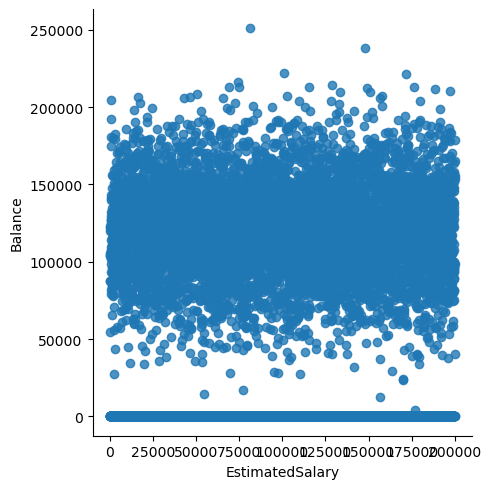

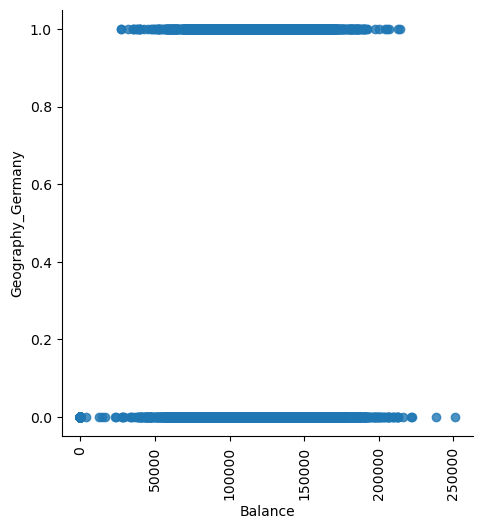

In [20]:
plt.figure(figsize=(12,4))
sns.lmplot(data=dumies_data, x='EstimatedSalary',y='Balance',fit_reg=False)
sns.lmplot(data=dumies_data, x='Balance',y='Geography_Germany',fit_reg=False)
plt.xticks(rotation='vertical')
plt.show()

In [21]:
dumies_data.corr()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
CreditScore,1.000000,-0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094,-0.008928,0.005538,0.004780
Gender,-0.002857,1.000000,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106512,0.006772,-0.024628,0.016889
Age,-0.003965,-0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323,-0.039208,0.046897,-0.001685
Tenure,0.000842,0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001,-0.002848,-0.000567,0.003868
Balance,0.006268,0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533,-0.231329,0.401110,-0.134892
NumOfProducts,0.012238,-0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820,0.001230,-0.010419,0.009039
HasCrCard,-0.005458,0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138,0.002467,0.010577,-0.013480
IsActiveMember,0.025651,0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128,0.003317,-0.020486,0.016732
EstimatedSalary,-0.001384,-0.008112,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097,-0.003332,0.010297,-0.006482
Exited,-0.027094,-0.106512,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000,-0.104955,0.173488,-0.052667


C:\Users\hp\AppData\Local\Temp\ipykernel_1784\4030314367.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  try_fearture = sns.kdeplot(dumies_data.HasCrCard[(dumies_data['Exited']==1)],color="Green", shade=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_1784\4030314367.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  try_fearture = sns.kdeplot(dumies_data.HasCrCard[(dumies_data['Exited']==0)],color="Red", shade=True)


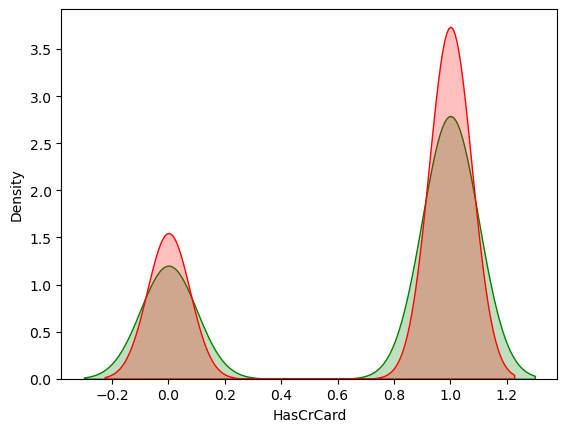

In [22]:
try_fearture = sns.kdeplot(dumies_data.HasCrCard[(dumies_data['Exited']==1)],color="Green", shade=True)
try_fearture = sns.kdeplot(dumies_data.HasCrCard[(dumies_data['Exited']==0)],color="Red", shade=True)


C:\Users\hp\AppData\Local\Temp\ipykernel_1784\1547806623.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  try_fearture = sns.kdeplot(dumies_data.NumOfProducts[(dumies_data['Exited']==1)],color="Green", shade=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_1784\1547806623.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  try_fearture = sns.kdeplot(dumies_data.NumOfProducts[(dumies_data['Exited']==0)],color="Red", shade=True)


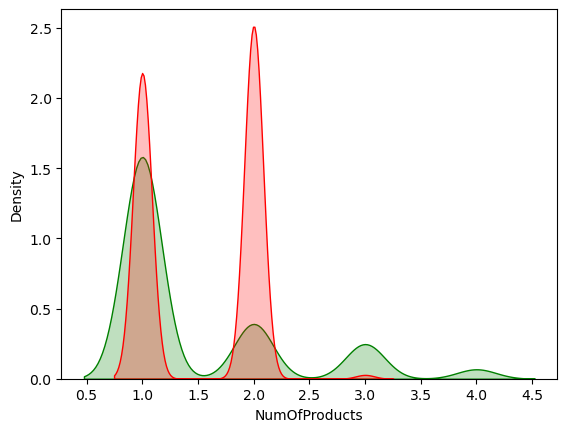

In [23]:
try_fearture = sns.kdeplot(dumies_data.NumOfProducts[(dumies_data['Exited']==1)],color="Green", shade=True)
try_fearture = sns.kdeplot(dumies_data.NumOfProducts[(dumies_data['Exited']==0)],color="Red", shade=True)


C:\Users\hp\AppData\Local\Temp\ipykernel_1784\1145924731.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  try_fearture = sns.kdeplot(dumies_data.Balance[(dumies_data['Exited']==1)],color="Green", shade=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_1784\1145924731.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  try_fearture = sns.kdeplot(dumies_data.Balance[(dumies_data['Exited']==0)],color="Red", shade=True)


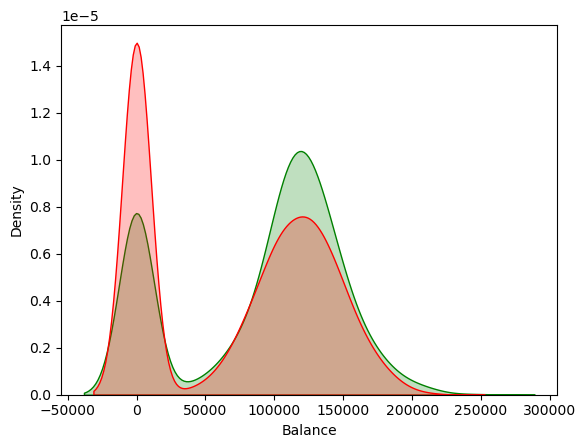

In [24]:
try_fearture = sns.kdeplot(dumies_data.Balance[(dumies_data['Exited']==1)],color="Green", shade=True)
try_fearture = sns.kdeplot(dumies_data.Balance[(dumies_data['Exited']==0)],color="Red", shade=True)


C:\Users\hp\AppData\Local\Temp\ipykernel_1784\2386273386.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  try_fearture = sns.kdeplot(dumies_data.Tenure[(dumies_data['Exited']==1)],color="Green", shade=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_1784\2386273386.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  try_fearture = sns.kdeplot(dumies_data.Tenure[(dumies_data['Exited']==0)],color="Red", shade=True)


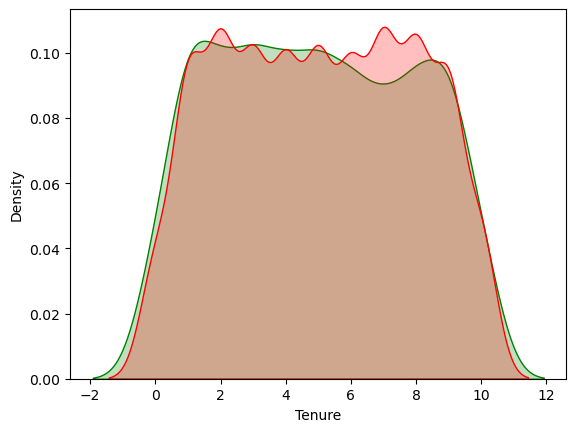

In [25]:
try_fearture = sns.kdeplot(dumies_data.Tenure[(dumies_data['Exited']==1)],color="Green", shade=True)
try_fearture = sns.kdeplot(dumies_data.Tenure[(dumies_data['Exited']==0)],color="Red", shade=True)


C:\Users\hp\AppData\Local\Temp\ipykernel_1784\1286058275.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  try_fearture = sns.kdeplot(dumies_data.Age[(dumies_data['Exited']==1)],color="Green", shade=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_1784\1286058275.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  try_fearture = sns.kdeplot(dumies_data.Age[(dumies_data['Exited']==0)],color="Red", shade=True)


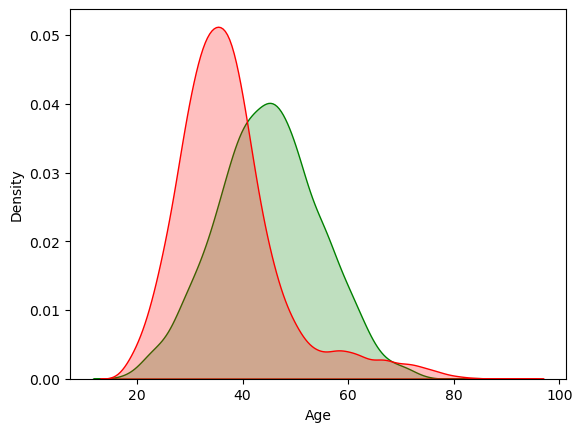

In [26]:
try_fearture = sns.kdeplot(dumies_data.Age[(dumies_data['Exited']==1)],color="Green", shade=True)
try_fearture = sns.kdeplot(dumies_data.Age[(dumies_data['Exited']==0)],color="Red", shade=True)


jiski age km hogi uske chance jyada hai churn krne ke

C:\Users\hp\AppData\Local\Temp\ipykernel_1784\907555949.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  try_fearture = sns.kdeplot(dumies_data.CreditScore[(dumies_data['Exited']==1)],color="Blue", shade=True)  #churn
C:\Users\hp\AppData\Local\Temp\ipykernel_1784\907555949.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  try_fearture = sns.kdeplot(dumies_data.CreditScore[(dumies_data['Exited']==0)],color="Red", shade=True)   #No churn


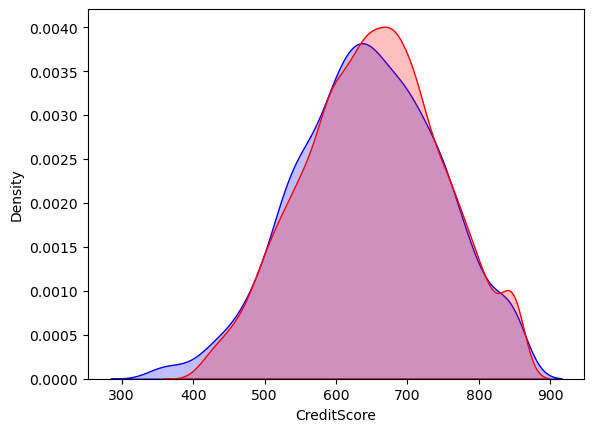

In [27]:
try_fearture = sns.kdeplot(dumies_data.CreditScore[(dumies_data['Exited']==1)],color="Blue", shade=True)  #churn
try_fearture = sns.kdeplot(dumies_data.CreditScore[(dumies_data['Exited']==0)],color="Red", shade=True)   #No churn


<Axes: >

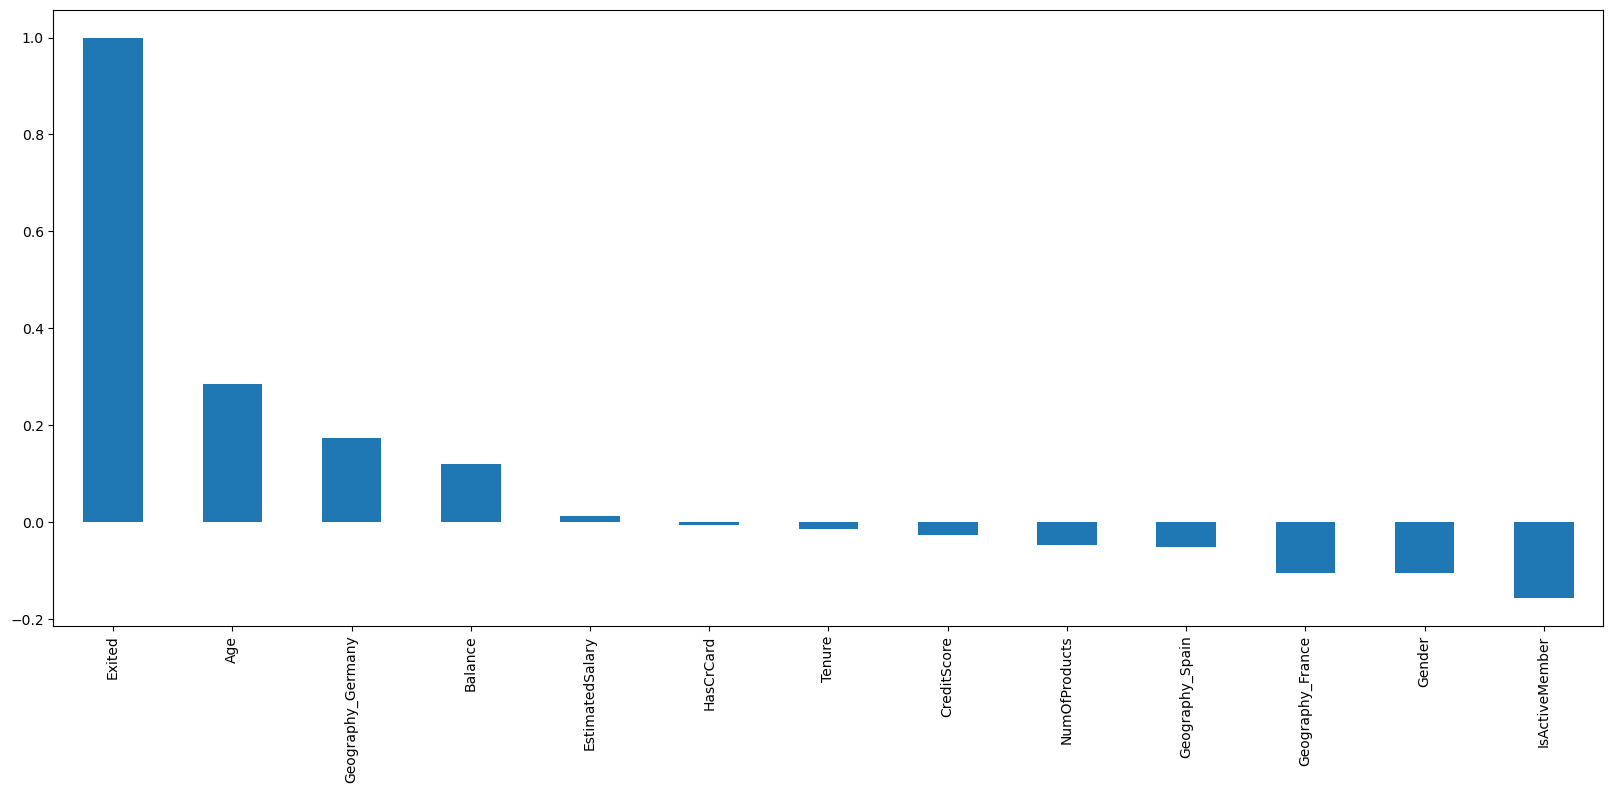

In [28]:
# try_fearture = sns.kdeplot(dumies_data.CreditScore[(dumies_data['Exited']==1)],color="Blue", shade=True)  #churn
# try_fearture = sns.kdeplot(dumies_data.CreditScore[(dumies_data['Exited']==0)],color="Red", shade=True)   #No churn
plt.figure(figsize=(20,8))
dumies_data.corr()['Exited'].sort_values(ascending=False).plot(kind='bar')

Correlation chart with respect to Exited

<Axes: >

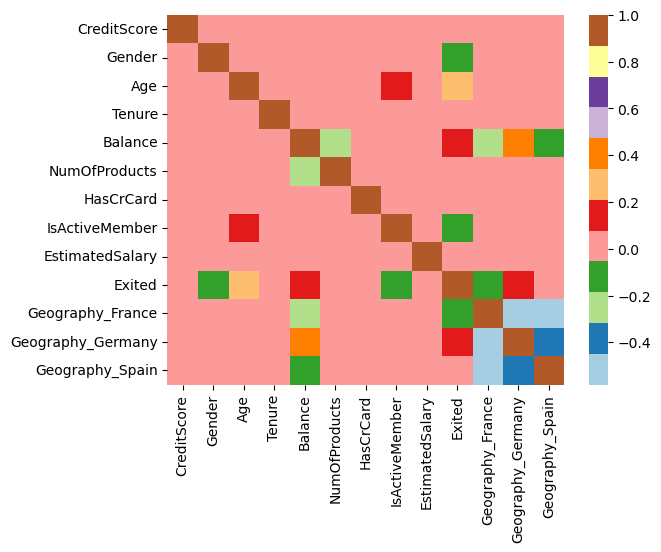

In [29]:
sns.heatmap(dumies_data.corr(),cmap="Paired")

In [30]:
# creating x and y variables
# x => independent variable
# Y => Dependent Variable\

x = dumies_data.drop("Exited",axis=1)

In [31]:
x

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,1,0,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,1,0,0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,0,0
9998,772,1,42,3,75075.31,2,1,0,92888.52,0,1,0


In [32]:
y = dumies_data['Exited']
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Variable X contains differnt features

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.2)

In [35]:
# model = LinearRegression()
# model.fit(X_train,Y_train)
# y_pred = model.predict(X_test)
# print(y_pred)

In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

# Decision Tree

In [98]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
model_dt = DecisionTreeClassifier(criterion='gini',random_state=100, max_depth=6,min_samples_leaf=8)


In [100]:
model_dt.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [106]:
y_pred = model_dt.predict(X_test)

In [103]:
y_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [109]:
model_dt.score(X_test,y_pred)

1.0

In [41]:
from sklearn.metrics import classification_report

In [112]:
print(classification_report(Y_test,y_pred,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1621
           1       0.72      0.44      0.54       379

    accuracy                           0.86      2000
   macro avg       0.80      0.70      0.73      2000
weighted avg       0.85      0.86      0.85      2000



# up sampling or down sampling

In [118]:
from imblearn.combine import SMOTEENN

In [123]:
sm = SMOTEENN()
X_resampled, Y_resampled = sm.fit_resample(x,y)


In [124]:
X_retrain, X_retest, Y_retrain, Y_retest = train_test_split(X_resampled,Y_resampled,test_size=0.2)

In [126]:
model_dt_resampled = DecisionTreeClassifier(criterion='gini',random_state=100, max_depth=6,min_samples_leaf=8)

In [128]:
model_dt_resampled.fit(X_retrain,Y_retrain)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [129]:
y_repred = model_dt_resampled.predict(X_retest)

In [131]:
print(classification_report(Y_retest,y_repred,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.84      0.78      0.80       603
           1       0.83      0.87      0.85       734

    accuracy                           0.83      1337
   macro avg       0.83      0.83      0.83      1337
weighted avg       0.83      0.83      0.83      1337



# Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=100,criterion='gini',random_state=100, max_depth=6,min_samples_leaf=8)
model_rf.fit(X_train,Y_train)
y_pred_rf = model_rf.predict(X_test)

In [38]:
print(classification_report(Y_test,y_pred_rf,labels=[0,1]))

NameError: name 'classification_report' is not defined

In [39]:
from imblearn.combine import SMOTEENN
sm = SMOTEENN()
X_resampled, Y_resampled = sm.fit_resample(x,y)
X_retrain, X_retest, Y_retrain, Y_retest = train_test_split(X_resampled,Y_resampled,test_size=0.2)
model_rf_resampled = RandomForestClassifier(n_estimators=100,criterion='gini',random_state=100, max_depth=6,min_samples_leaf=8)
model_rf_resampled.fit(X_retrain,Y_retrain)
y_repred_rf = model_rf_resampled.predict(X_retest)

In [40]:
print(classification_report(Y_retest,y_repred_rf,labels=[0,1]))

NameError: name 'classification_report' is not defined

In [45]:
import pickle
model = pickle.dump(model_rf_resampled,open('model.sav','wb'))
# pickle.dump(mnb,open('vectroizer.pkl', 'wb'))

In [42]:
read_model = pickle.load(open('model.sav','rb'))

In [43]:
read_model.score(X_retest,Y_retest)

0.8424710424710424

In [57]:
import pickle
import joblib
# pickle.dump(model_rf_resampled,open('model.sav','wb'))


# Saving the model
joblib.dump(model, "modelfinal.pkl")

# Loading the model
loaded_model = joblib.load("model.joblib")


# pickle.dump(mnb,open('vectroizer.pkl', 'wb'))
# read_model = pickle.load(open('model.sav','rb'))

In [59]:
loaded_model

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)